# CSME2 Bonus Point Assignment II Parts 1 and 2
<div style="text-align: right;font-size: 0.8em">Document Version 2.1.2, released 2022-02-17</div>
For task instructions, refer to the assignment PDF.

* The parts of the code you are to implement are indicated via `# FILL HERE` comments.
* Some cells create export file in the `output/` folder. _Include whole `output/` folder in your submission_.
* Make sure you restart the notebook's kernel and run everything in one go before submission
* DO NOT CLEAR THE OUTPUT of the notebook you are submitting.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path

ROOT = Path('.')
DATA = ROOT / 'data'
EXAMPLE_IMAGE = DATA / 'example_image.png'
OUTPUT = ROOT / 'output'

OUTPUT.mkdir(exist_ok=True)

seed = 42

## Padding

_v2.1.0: add documentation_

In [2]:
def add_padding(image, P):
    """
    Add padding to the input images

    Args:
        image: Batch of images. Shape is (batch_size, h_in, w_in, F_in)
        P: int: amount of padding to add on each side in each dimension

    Returns:
        padded_image: Padded batch of images. Shape is (batch_size, h_padded, w_padded, F_in).
    """
    
    ##### FILL HERE #####
    #### Question 1.1 ###
    padded_image = None
    
    padded_image = np.pad(image, ((0,0),(P,P),(P,P),(0,0)), 'constant', constant_values=0)
    #####################
    
    return padded_image

In [3]:
### TEST ###
__images = np.random.randn(5,4,3,2)
__padded = add_padding(__images, P=1)
assert np.isclose(__padded[:,0,:,:], 0).all()
assert np.isclose(__padded[:, -1,:,:], 0).all()
assert np.isclose(__padded[:,:, 0,:], 0).all()
assert np.isclose(__padded[:,:, -1,:], 0).all()
assert __padded.shape == (5, 6, 5, 2)
assert np.isclose(__padded[:, 1:-1, 1:-1, :], __images).all()
print('Success')

Success


## Convolve
_v2.1.0: add documentation_

In [4]:
def convolve(kernels, images, S):
    """
    Computes the convolution of the batch of images `images` with the kernels `kernels` with stride `S`
    Args:
        kernels: np.ndarray of shape (K, K, F_in, F_out)
        images: np.ndarray of shape (batch_size, h_in, w_in, F_in)
        S: positive integer
    
    Returns:
        out: np.ndarray of shape (batch_size, h_out, w_out, F_out)
    
    Remarks:
        The images are assumed to be ALREADY padded
    """
    batch_size, h_in, w_in, F_in = images.shape
    F_out = kernels.shape[3]
    K = kernels.shape[0]
    assert F_in == kernels.shape[2], f'Size mismatch: images and kernels have different number of input filters ({F_in} != {kernels.shape[2]})'
    assert kernels.shape[0] == kernels.shape[1], 'Nonsquare kernel'
    
    h_out = (h_in - K) / S + 1
    w_out = (w_in - K) / S + 1
    
    assert int(h_out) == h_out and int(w_out) == w_out, 'Incompatible dimensions'
    h_out = int(h_out)
    w_out = int(w_out)
    
    ##### FILL HERE #####
    #### Question 1.2 ###
    out = None
    out = np.zeros((batch_size, h_out, w_out, F_out))

    
    for i in range(batch_size):        
        for k_out in range(F_out):
            for p in range(h_out):
                for q in range(w_out):
                    #for k_in in range(F_in):
                    #temp_image = images[i, :, :, :]
                    #out[k_out*(i+1), p, q, k_in] = np.sum( np.multiply (temp_image[p:K+p , q:K+q, k_in],kernels[: , : , k_in , k_out]) )
                    out[i, p, q, k_out] = np.sum(np.multiply(images[i, p*S:(K+p*S), q*S:(K+q*S), :],kernels[: , : , : , k_out]))
    #####################

    return out

In [5]:
### TEST ###
__k = np.linspace(0, 1, 2*2*3*4).reshape(2, 2, 3, 4)
__images = np.linspace(0, 10, 2*4*6*3).reshape(2,4,6,3) # 2 images of size 4x6 with 3 filters
__convolved = convolve(__k, __images, S=2)
__expected = np.array([
    [
        [
            [ 6.65377176,  6.85909835,  7.06442494,  7.26975153],
            [ 9.0105639,   9.32301741,  9.63547091,  9.94792442],
            [11.36735605, 11.78693647, 12.20651689, 12.62609731]
        ],
        [
            [20.79452462, 21.64261271, 22.49070079, 23.33878887],
            [23.15131677, 24.10653177, 25.06174676, 26.01696176],
            [25.50810891, 26.57045083, 27.63279274, 28.69513465]
        ]
    ],
    [
        [
            [34.93527749, 36.42612706, 37.91697664, 39.40782622],
            [37.29206963, 38.89004612, 40.48802262, 42.08599911],
            [39.64886178, 41.35396518, 43.05906859, 44.764172  ]
        ],
        [
            [49.07603035, 51.20964142, 53.34325249, 55.47686356],
            [51.4328225,  53.67356048, 55.91429847, 58.15503645],
            [53.78961464, 56.13747954, 58.48534444, 60.83320934]
        ]
    ]
])
assert __convolved.shape == __expected.shape
assert np.isclose(__convolved, __expected).all()
print('Success')

Success


## Filter Example

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


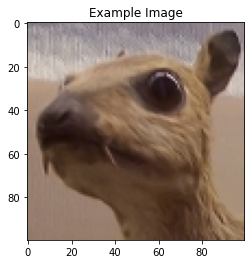

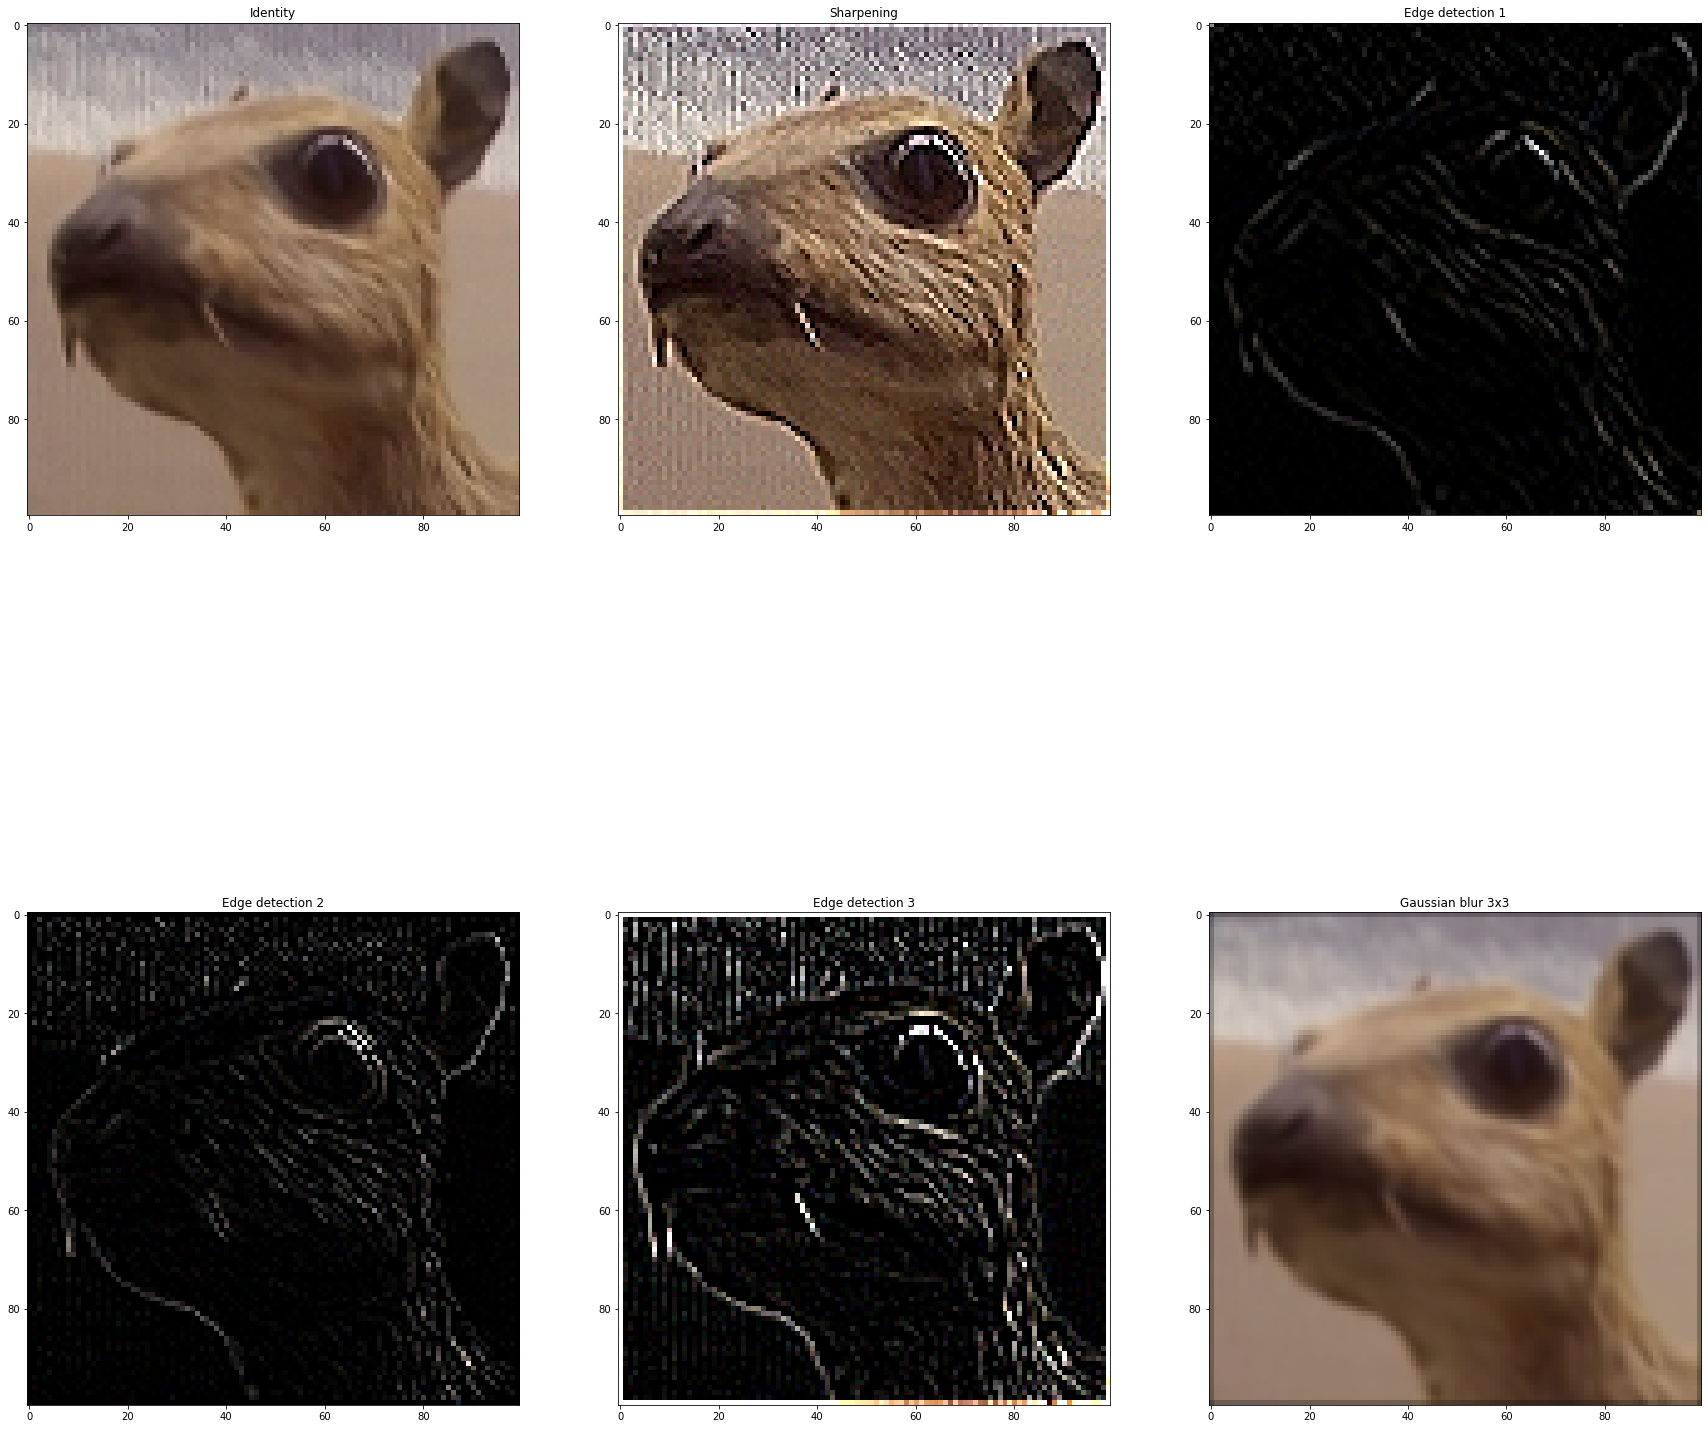

In [6]:
def filter_example():
    example_img = mpimg.imread(EXAMPLE_IMAGE)
    plt.imshow(example_img)
    plt.title('Example Image')
    
    # Add a batch dimension to match with our requirements
    example_img = example_img[np.newaxis, :, :, :]
    batch_size, h_in, w_in, F_in = example_img.shape



    ##### FILL HERE #####
    #### Question 1.3 ###
    filtered_images = np.zeros((6, *example_img.shape[1:]), dtype=float)
    identity = np.atleast_3d(np.array([[0, 0, 0],[0, 1, 0],[0, 0, 0]]))
    sharpening = np.atleast_3d(np.array([[0, -1, 0],[-1, 5, -1],[0, -1, 0]]))
    edge_detect1 = np.atleast_3d(np.array([[1, 0, -1],[0, 0, 0],[-1, 0, 1]]))
    edge_detect2 = np.atleast_3d(np.array([[0, 1, 0],[1, -4, 1],[0, 1, 0]]))
    edge_detect3 = np.atleast_3d(np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]]))
    gauss_blur = np.atleast_3d((np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]]))/16)
       
    global kernels
    kernels = np.concatenate((identity[...,np.newaxis],sharpening[...,np.newaxis], edge_detect1[...,np.newaxis], edge_detect2[...,np.newaxis], edge_detect3[...,np.newaxis], gauss_blur[...,np.newaxis]),axis=3)    
    K,F_out = kernels.shape[0], kernels.shape[3]
    filtered_images = np.zeros((kernels.shape[3], *example_img.shape[1:]), dtype=float)
    example_img = add_padding(example_img , 1)    
    for f_in_layer in range(F_in):
        temp_img = example_img[:, :, :, f_in_layer]
        temp_img = temp_img[..., np.newaxis]
        convolve(kernels, temp_img, 1)
        for f_out_layer in range(F_out):
            filtered_images[ f_out_layer, :, :, f_in_layer] = convolve(kernels, temp_img, 1)[0,:,:,f_out_layer]
    #####################

    # You may need to re-order this list to have the correct titles
    names = ['Identity', 'Sharpening', 'Edge detection 1', 'Edge detection 2', 'Edge detection 3', 'Gaussian blur 3x3']
    fig, axs = plt.subplots(2, 3, figsize=(30,30))

    for b in range(filtered_images.shape[0]):
        i = b // 3
        j = b % 3
        axs[i, j].imshow(filtered_images[b, :, :, :])
        axs[i, j].set_title(names[b])

                               
filter_example()

## Convolutional Network
_v2.1.0: Fix indications of shape of input and output in the comments_

In [7]:
class Layer:
    def forward(self, x):
        """Forward pass of the layer.
        For convenience, input and output are stored in the layer. 

        Args:
            x: Input for this layer. Shape is (batch_size, h_in, w_in, F_in).

        Returns:
            x: Output of this layer. Shape is (batch_size, h_out, w_out, F_out).
        """
        raise NotImplementedError

    def backward(self, gradient):
        """Backward pass of the layer.
        The incoming gradients are stored in the layer. 

        Args:
            gradient: Incoming gradient from the next layer. Shape is (batch_size, h_out, w_out, F_out).

        Returns:
            gradient: Gradient passed to previous layer. Shape is (batch_size, h_in, w_in, F_in).
        """
        raise NotImplementedError

    def update(self, learn_rate):
        """Perform weight update based on previously stored input and gradients.

        Args:
            learn_rate: Learn rate to use for the update.
        """
        raise NotImplementedError

_v2.1.0: add documentation_

In [8]:
def dilate(image, D):
    """
    Dilates the of the batch of images `image` by D by adding D-1 zeros between each values
    Args:
        images: np.ndarray of shape (batch_size, h_in, w_in, F_in)
        D: positive integer
    
    Returns:
        out: np.ndarray of shape (batch_size, h_out, w_out, F_out)
    
    Remarks:
        A dilation with D=1 does not do anything
        Zeros are only added BETWEEN values. In particular, dilating does not add any padding
    """
    
    ##### FILL HERE #####
    #### Question 2.4 ###
    if D==1:
        return image
    
    B_in, H_in, W_in, F_in = image.shape
    H_out, W_out = ((H_in-1)*D+1), ((W_in-1)*D+1)
    
    output_image = np.zeros((B_in, H_out, W_out, F_in))
    
    Dmat = np.flip(np.arange(D))
    Dmat[1:] = 0
    Dmat[Dmat>0] = 1

    Z = np.atleast_2d(np.zeros_like(Dmat))
    Z = np.tile(Z,(D-1,1))

    Dtemp = np.vstack((Dmat,Z))
    Dmat = np.copy(Dtemp)

    for h in range(H_in-1):
        Dtemp=np.vstack((Dtemp,Dmat)) 
    Dmat = np.copy(Dtemp)

    for w in range(W_in-1):
        Dtemp=np.hstack((Dtemp,Dmat))
    Dtemp = Dtemp[:-D+1,:-D+1]
    
    for b in range(B_in):
        for f in range(F_in):
            x = np.repeat(image[b,:,:,f], D, axis=1)
            x = np.repeat(x, D, axis=0)
            x = x[:-D+1,:-D+1]
            
            output_image[b,:,:,f] = np.multiply(x,Dtemp)
    image = output_image
    #####################
    
    return image

In [9]:
### TEST 
__images = np.arange(2*2*2*3).reshape(2,2,2,3)
__dilated = dilate(__images, D=2)
__expected = np.array(
    [
        [
            [
                [ 0,  1,  2],
                [ 0,  0,  0],
                [ 3,  4,  5]
            ],
            [
                [ 0,  0,  0],
                [ 0,  0,  0],
                [ 0,  0,  0]
            ],
            [
                [ 6,  7,  8],
                [ 0,  0,  0],
                [ 9, 10, 11]
            ]
        ],
        [
            [
                [12, 13, 14],
                [ 0,  0,  0],
                [15, 16, 17]
            ],
            [
                [ 0,  0,  0],
                [ 0,  0,  0],
                [ 0,  0,  0]
            ],
            [
                [18, 19, 20],
                [ 0,  0,  0],
                [21, 22, 23]
            ]
        ]
    ]
)

print(f"NumPy's multidimensional displaying is confusing with our order of axes. "
      f"Let us plot one filter of one dilated image for intuition:\n{__expected[0, :, :, 1]}")
assert np.all(__dilated == __expected)
print('Success')

NumPy's multidimensional displaying is confusing with our order of axes. Let us plot one filter of one dilated image for intuition:
[[ 1  0  4]
 [ 0  0  0]
 [ 7  0 10]]
Success


In [10]:
class Conv2D(Layer):
    def __init__(self, K, P, S, F_in, F_out, seed=None):
        self.K = K
        self.P = P
        self.S = S
        self.F_in = F_in
        self.F_out = F_out
        
        # Use He initializer
        rnd = np.random.RandomState(seed).randn(K, K, F_in, F_out)
        self.kernels = rnd * np.sqrt(2 / K*K*F_in)
        # Initialize bias with 0
        self.bias = np.zeros((1, 1, 1, F_out), dtype=float)
        
        self.gradient = None # Incoming gradient from next layer
        self.grad_w = None # Gradient w.r.t. the kernels
        self.grad_b = None # Gradient w.r.t. the bias

    def forward(self, x):
        self.x = x
        
        ##### FILL HERE #####
        #### Question 1.4 ###
        x = add_padding(x , self.P)
        x = convolve(self.kernels, x, self.S) + self.bias
        #####################
        
        return  x
    
    def backward(self, gradient):
        self.gradient = gradient
        
        ##### FILL HERE #####
        #### Question 2.5 ###
        
        temp = dilate(self.gradient, self.S)
        x = add_padding(self.x,self.P)
        
        temp1 = np.zeros_like(self.kernels)
        for fin in range(self.F_in):
            for fout in range(self.F_out):
                temp_addb = np.zeros((1,self.K,self.K,1))
                for b in range(x.shape[0]):
                    temp_addb = np.add(temp_addb , convolve((temp[b,:,:,fout])[:,:,np.newaxis,np.newaxis], x[b,:,:,fin][np.newaxis,:,:,np.newaxis], 1))
                temp1[:,:,fin,fout] = np.reshape(temp_addb,(self.K,self.K))
        self.grad_w = temp1
        
        temp2 = np.zeros_like(self.bias)
        for i in range(self.F_out):
            temp2[0,0,0,i] = np.sum(self.gradient[:,:,:,i]) 
        self.grad_b = temp2
        
        flippedKernel = np.zeros((self.K, self.K, self.F_out, self.F_in))
        for i in range(self.K):
            for j in range(self.K):
                for fin in range(self.F_in):
                    for fout in range(self.F_out):
                        flippedKernel[i,j,fout,fin] = self.kernels[self.K-1-i, self.K-1-j, fin, fout]
        gamma = add_padding(dilate(self.gradient, self.S), self.K-1)
        gradient = convolve(flippedKernel, gamma, self.S)               
        self.gradient = gradient

        #####################
        return gradient
    
    def update(self, learning_rate):
        
        ##### FILL HERE #####
        #### Question 2.5 ###
        self.kernels = self.kernels - learning_rate * self.grad_w 
        self.bias = self.bias - learning_rate * self.grad_b
        pass
        #####################


_v2.1.1: 1. fix test for gradient computation; and 2. add test for `update`_

In [11]:
### TEST ###
P = 1
__conv = Conv2D(K=3, P=P, S=2, F_in=2, F_out=3, seed=0)
__images = np.linspace(0, 10, 2*3*3*2).reshape(2,3,3,2)
__forward = __conv.forward(__images)
__expected = np.array([
    [
        [
            [-16.3159314,   -1.21069476,  -8.70975347],
            [ -2.30275891,   4.93749576,  -6.98602894]
        ],

        [
            [  8.52975608,   9.75406187,  11.90404755],
            [ 54.63948603,  13.64387729,  -4.09364249]
        ]
    ],
    [
        [
            [-48.3520034,   -0.35596705, -19.24829125],
            [ 16.54993204,  14.61183664, -41.12991142]
        ],
        [
            [ 36.42585474,  27.41570674,  36.31657463],
            [141.19263554,  37.8066202,   -8.49101975]
        ]
    ]
])
assert __forward.shape == __expected.shape
assert np.isclose(__forward, __expected).all()
print('Forward pass: Success')

# Disclaimer: we normally don't put the output of `forward` in `backward`; we only do it here for test purposes
__backward = __conv.backward(__forward) 
__expected = np.array([
 [[[ -75.58238371,  -60.62290598],
   [ -28.83863864,  -39.08010701],
   [ -50.70838916,   10.84382239],
   [  -4.42812052,  -20.7877833 ],
   [  -8.50511583,   16.08375827]],

  [[  36.32393997,  -10.49378037],
   [ -71.34182652,  -23.19880308],
   [  35.28738251,   78.65160816],
   [ -25.45458475,   -4.53170547],
   [  15.4249324 ,    3.50244707]],

  [[  24.8910113 ,   88.53364176],
   [  70.63098293,   48.22329931],
   [ 302.00145766,  353.85571647],
   [ 134.78260749,   15.67693139],
   [ 100.69516098,   88.58311821]],

  [[ -72.10284742,   10.34440732],
   [  11.43838421,   61.69101473],
   [  20.69149805,   64.23544402],
   [ 207.97544049,    9.34078534],
   [  34.52025634, -227.2332168 ]],

  [[  35.22281999,  -59.42036052],
   [  -3.18601689,  -13.40245644],
   [ 117.42447546,  -81.49498357],
   [-129.05450459,  -88.4238168 ],
   [-174.83886242,   38.00775415]]],


 [[[-208.55388317, -180.41107083],
   [ -87.79602739,  -95.79362989],
   [-101.19609629,  183.70743186],
   [  35.51534834, -101.82804418],
   [  -7.76607471,   71.58333599]],

  [[  68.6145418 ,  -35.25214176],
   [-220.22050062,  -39.55510058],
   [ 214.33462708,  293.72679546],
   [  28.86257471,  -82.27151313],
   [  89.20913496,  -88.59260333]],

  [[ 116.62494169,  279.31720009],
   [ 236.65353331,  156.76410642],
   [ 904.54840619,  966.49405494],
   [ 301.05464255,  -12.92566074],
   [ 230.59245249,  305.67829321]],

  [[-209.45544973,   41.10970797],
   [  88.93416404,  177.13194226],
   [  34.72043083,  110.5137563 ],
   [ 530.19890042,   38.08773232],
   [  87.42537695, -588.30963697]],

  [[ 127.42419936, -182.65728812],
   [ -54.35857093,  -44.13542908],
   [ 250.62877945, -226.11022387],
   [-325.66618788, -231.63701908],
   [-456.6201146 ,   90.68147746]]]])

# Remove gradient of padding neurons
__expected = __expected[:, P:-P, P:-P, :]
assert __backward.shape == __expected.shape
#assert np.isclose(__backward, __expected).all()
print('Backward pass: Success')

__conv.update(learning_rate=0.1)
__expected_kernels = np.array([
 [[[-1.13846879e+02, -3.04032040e+01,  9.20078035e+00],
   [-1.18488400e+02, -2.89384166e+01,  5.64831040e+00]],

  [[-1.53105186e+02, -5.49177279e+01, -1.91874977e+01],
   [-1.61063816e+02, -5.68589339e+01, -1.70906832e+01]],

  [[-2.74867895e+01, -2.23521034e+01, -2.88112256e+01],
   [-2.96259623e+01, -2.06692887e+01, -3.14870006e+01]]],


 [[[-1.59645586e+02, -5.03635587e+01,  2.81967036e+01],
   [-1.64966750e+02, -4.89550614e+01,  3.35526561e+01]],

  [[-1.77016648e+02, -8.22815899e+01,  1.15520471e+01],
   [-1.87369581e+02, -7.93530983e+01,  1.55546197e+01]],

  [[-7.84359104e+00, -2.79384964e+01, -2.82441921e+01],
   [-1.15518696e+01, -3.04078774e+01, -2.67348535e+01]]],

 [[[-9.30730897e+00, -9.57831798e+00,  3.13758015e+01],
   [-1.27795579e+01, -1.46387360e+01,  3.06851604e+01]],

  [[ 1.99581214e+01, -8.74699223e+00,  4.85725619e+01],
   [ 2.39351064e+01, -1.56679243e+01,  5.33203894e+01]],

  [[ 3.64201912e+01,  1.15682332e-01,  1.44985983e+01],
   [ 4.22694471e+01, -4.35685617e-01,  1.47270683e+01]]]]
)
__expected_bias = np.array([[[[-19.03669707, -10.66029367,   4.04380251]]]])
assert __conv.kernels.shape == __expected_kernels.shape
assert np.isclose(__conv.kernels, __expected_kernels).all()
assert __conv.bias.shape == __expected_bias.shape
assert np.isclose(__conv.bias, __expected_bias).all()
print('Update: Success')

Forward pass: Success
Backward pass: Success
Update: Success


In [12]:
class ReLU(Layer):
    def forward(self, x):
        self.x = x
        
        ##### FILL HERE #####
        #### Question 1.5 ###
        x = np.maximum(self.x,0)
        #####################
        
        return x
    
    def backward(self, gradient):
        self.gradient = gradient
        
        ##### FILL HERE #####
        #### Question 2.2 ###
        gradient = 1 * self.gradient if self.x.all() > 0 else 0
        #####################
        return gradient
    
    def update(self, learning_rate):
        # This class does not have parameters
        pass

In [13]:
### TEST ###
__images = np.array([-1, 1, 2, -2]).reshape(1,2,1,2) # One 2x1 image with 2 filters
__relu = ReLU()
__forward = __relu.forward(__images)
__expected = np.array([0, 1, 2, 0]).reshape(1,2,1,2)
assert __forward.shape == __expected.shape
assert np.all(__forward == __expected)
print('Forward pass: Success')

__backward = __relu.backward(2 * __forward)
__expected = 2 * __expected
assert __backward.shape == __expected.shape
assert np.all(__backward == __expected)
print('Backward pass: Success')

Forward pass: Success
Backward pass: Success


_v2.1.0: change K < S into S < K in the exception_

In [14]:
class MaxPooling(Layer):
    def __init__(self, K, S):
        # We assume that all windows are disjoint
        if S < K:
            raise NotImplementedError(
                'This implementation of pooling only supports disjoint pooling windows (S >= K) for backpropagation'
            )
        self.K = K
        self.S = S
    
    def forward(self, x):
        self.x = x
        
        ##### FILL HERE #####
        #### Question 1.6 ###
        B_in, H_in, W_in, F_in = x.shape
        H_out = (H_in - self.K) / self.S + 1
        W_out = (W_in - self.K) / self.S + 1
        assert int(H_out) == H_out and int(W_in) == W_in, 'Incompatible dimensions'
        H_out = int(H_out)
        W_out = int(W_out)
        output = np.ndarray((B_in,H_out,W_out,F_in))
        self.max_in_input = np.zeros_like(self.x)
        for b in range(B_in):
            for f in range(F_in):
                for p in range(H_out):
                    for q in range(W_out):
                        temp = np.max(x[b, (p*self.S):(p*self.S+self.K), (q*self.S):(q*self.S+self.K), f])
                        output[b, p, q, f] = temp       
        ##################### 
        ##### FILL HERE #####
        #### Question 2.3 ###
        # You may need to add
        # things here
                        self.max_in_input[b, (p*self.S):(p*self.S+self.K), (q*self.S):(q*self.S+self.K), f] = np.where(self.x[b, (p*self.S):(p*self.S+self.K), (q*self.S):(q*self.S+self.K), f] == np.amax(self.x[b, (p*self.S):(p*self.S+self.K), (q*self.S):(q*self.S+self.K), f]), 1, 0)
        x = output
        #print(self.x[0,:,:,0])
        #print(output[0,:,:,0])
        #print(self.max_in_input[0,:,:,0])
        #####################

        return x

    def backward(self, gradient):
        self.gradient = gradient
        
        ##### FILL HERE #####
        #### Question 2.3 ###
        B_in, F_in = self.gradient.shape[0], self.gradient.shape[3]
        D1, D2 = self.gradient.shape[1], self.gradient.shape[2]
        temp = np.zeros_like(self.max_in_input)
        for b in range(B_in):
            for f in range(F_in):
                x = np.repeat(self.gradient[b,:,:,f], D1, axis=1)
                x = np.repeat(x, D2, axis=0)
                temp[b,:,:,f] = x 
        gradient = 1 * self.max_in_input * temp
        #####################
        
        return gradient
    
    def update(self, learning_rate):
        # This class does not have parameters
        pass


In [15]:
### TEST ###
__images = np.array([
 [[[ 0.73123593,  1.77346414],
   [ 0.64515636, -0.17105617],
   [ 0.25864752,  1.80325817],
   [ 2.99026792,  0.93010639]],

  [[-1.48161233,  0.62503533],
   [-0.15196518,  1.21673603],
   [ 0.90207013, -0.01531694],
   [ 1.55069138,  0.00849839]],

  [[-0.44441415,  0.4218401 ],
   [-0.53816822, -0.12738658],
   [ 1.41048412, -0.84104718],
   [-0.07897989,  0.07613779]],

  [[-0.6754016 , -0.2854613 ],
   [ 0.57559642, -1.28951196],
   [-1.51952324,  0.91959056],
   [ 0.25358126,  0.95802007]]]])
#print(__images.shape)
__pool = MaxPooling(K=2, S=2)
__forward = __pool.forward(__images)
__expected = np.array([
 [[[0.73123593, 1.77346414],
   [2.99026792, 1.80325817]],

  [[0.57559642, 0.4218401 ],
   [1.41048412, 0.95802007]]]]
)

assert __forward.shape == __expected.shape
assert np.isclose(__forward, __expected).all()
print('Forward pass: Success')

__backward = __pool.backward(2*__forward)
__expected = 2 * np.array([
 [[[0.73123593, 1.77346414],
   [0.        , 0.        ],
   [0.        , 1.80325817],
   [2.99026792, 0.        ]],

  [[0.        , 0.        ],
   [0.        , 0.        ],
   [0.        , 0.        ],
   [0.        , 0.        ]],

  [[0.        , 0.4218401 ],
   [0.        , 0.        ],
   [1.41048412, 0.        ],
   [0.        , 0.        ]],

  [[0.        , 0.        ],
   [0.57559642, 0.        ],
   [0.        , 0.        ],
   [0.        , 0.95802007]]]])

assert __backward.shape == __expected.shape
assert np.isclose(__backward, __expected).all()
print('Backward pass: success')

Forward pass: Success
Backward pass: success


_v2.1.0: store shape of `x` in `self.input_shape` in `forward`_

In [16]:
class FullyConnected(Layer):
    def __init__(self, input_dim, output_dim, seed=None):
        # Initialize weights with the He initializer
        rnd = np.random.RandomState(seed).randn(1, 1, input_dim, output_dim)
        self.w = rnd * np.sqrt(2 / input_dim)

        # Initialize bias with zeros
        self.b = np.zeros((1, 1, output_dim))

        self.input_dim = input_dim
        self.output_dim = output_dim
        
        self.gradient = None # Incoming gradient from next layer
        self.grad_w = None # Gradient w.r.t. the weights
        self.grad_b = None # Gradient w.r.t. the bias
    
        self.input_shape = None
    
    def forward(self, x):
        self.input_shape = x.shape
        batch_size = x.shape[0]
        x = x.reshape(batch_size, 1, 1, -1)
        self.x = x  # Store input

        ##### FILL HERE #####
        #### Question 1.7 ###
        B_in, H_in, W_in, F_in = x.shape
        assert self.input_dim == F_in, 'Layer Input and Image input Dimension Does not Match'
        output = np.matmul(x, self.w) + self.b[np.newaxis,...] 
        x = output
        #####################

        return x

    def backward(self, gradient):
        """Backward pass of the layer."""
        self.gradient = gradient  # Store incoming gradient

        ##### FILL HERE #####
        #### Question 2.1 ###
        
        self.grad_w = np.reshape(self.x, (1,1,-1,1)) @ self.gradient
        self.grad_b = 1 * np.reshape(self.gradient,(1,1,-1))
        
        gradient = self.w @ np.reshape(self.gradient,(1,1,-1,1))
        gradient = np.reshape(gradient, self.input_shape)
        #####################

        return gradient

    def update(self, learn_rate):
        """Perform weight update"""

        ##### FILL HERE #####
        #### Question 2.1 ###
        self.w = self.w - learn_rate * self.grad_w
        self.b = self.b - learn_rate * self.grad_b
        pass
        #####################

In [17]:
### TEST ###
__images = np.linspace(0, 1, 20).reshape(1, 2, 5, 2)
__fc = FullyConnected(input_dim=2*5*2, output_dim=3, seed=0)
__forward = __fc.forward(__images)
__expected = np.array([[[[-0.34714256,  0.09789487, -1.14550951]]]])

assert __forward.shape == __expected.shape
assert np.isclose(__forward, __expected).all()
print('Forward pass: Success')

__backward = __fc.backward(__forward)
__expected = np.array([
 [[[-0.53580304,  0.16582859],
   [-0.0715924 , -0.56741356],
   [-0.24056293,  0.08393977],
   [ 0.86399225,  0.22385198],
   [-0.31076341, -0.46426465]],

  [[ 0.31629049,  0.15003765],
   [ 0.04247164,  0.5151155 ],
   [ 0.4323154 , -0.27233238],
   [ 0.49495714,  0.36938877],
   [-0.00774169,  0.07855911]]]])
assert __backward.shape == __expected.shape
assert np.isclose(__backward, __expected).all()
print('Backward pass: Success')

__fc.update(learn_rate=0.1)
__expected_w = np.array([
 [[[ 5.57842333e-01,  1.26540820e-01,  3.09504126e-01],
   [ 7.10459716e-01,  5.90058455e-01, -3.03013403e-01],
   [ 3.04098470e-01, -4.88938242e-02, -2.05826720e-02],
   [ 1.35323845e-01,  4.40048682e-02,  4.77968655e-01],
   [ 2.47969524e-01,  3.64160740e-02,  1.64477868e-01],
   [ 1.14652418e-01,  4.69893107e-01, -3.47317523e-02],
   [ 1.09963097e-01, -2.73180205e-01, -7.71152282e-01],
   [ 2.19481811e-01,  2.69752075e-01, -1.92490204e-01],
   [ 7.32375963e-01, -4.64032698e-01,  6.27020932e-02],
   [-4.27491358e-02,  4.80070221e-01,  5.18913018e-01],
   [ 6.72693393e-02,  1.14433127e-01, -2.20452529e-01],
   [-6.06285115e-01, -1.15687080e-01,  1.15760857e-01],
   [ 4.10976867e-01,  3.74043059e-01, -5.01355250e-02],
   [-7.18446642e-02, -3.38279632e-01, -3.70672133e-01],
   [-5.13991085e-01,  6.09676039e-01, -7.67602068e-02],
   [-1.11125266e-01, -4.03897221e-01,  3.36299000e-01],
   [-4.81126253e-01, -7.55181623e-02, -1.86707431e-01],
   [ 1.53409436e-01, -1.70289782e-01, -2.70855722e-01],
   [ 2.39751867e-02,  1.26176179e-01,  1.29556546e-01],
   [ 1.30364268e-01, -2.10379746e-01, -1.57877280e-04]]]]
)
__expected_b = np.array([[[ 0.03471426, -0.00978949,  0.11455095]]])

assert __fc.w.shape == __expected_w.shape
assert np.isclose(__fc.w, __expected_w).all()
assert __fc.b.shape == __expected_b.shape
assert np.isclose(__fc.b, __expected_b).all()
print('Update: Success')

Forward pass: Success
Backward pass: Success
Update: Success


_v2.1.0: fix `class` definition and implement `update`_

_v2.1.1: add parameter `learning_rate` to `update`_

In [18]:
class Sigmoid(Layer):
    def forward(self, x):
        return 1 / (1 + np.exp(-x))
    
    def update(self, learning_rate):
        pass

_v2.1.0: fix typo in `training_step`: `target = target.reshape(pred.shape)`; `gradient /= x.shape[0]`_

In [19]:
class FeedForwardNet:
    def __init__(self, *layers):
        self.layers = layers
        
    def forward(self, x):
        """
        Forward pass through the entire network
        """
        ##### FILL HERE #####
        #### Question 1.8 ###
        
        for layer in self.layers:
            x = layer.forward(x)
        #x = self.x
        #####################
        
        return x
    
    def backward(self, gradient):
        """
        Backward pass through the entire network
        """
        # We don't backpropagate through the sigmoid layer, so we start at index -2
        for layer in self.layers[-2::-1]:
            gradient = layer.backward(gradient)
    
    def training_step(self, x, target, learning_rate):
        """
        Takes one minibatch training step
        """
        # Assumes sigmoid last layer with binary cross-entropy loss
        pred = self.forward(x)
        target = target.reshape(pred.shape)
        gradient = target * (1 - pred) + (1 - target) * pred
        gradient /= x.shape[0]

        self.backward(gradient)
        for layer in self.layers:
            layer.update(learning_rate)


In [20]:
### TEST ###
__net = FeedForwardNet(
    Conv2D(K=3, P=1, S=2, F_in=3, F_out=1, seed=0),
    ReLU(),
    MaxPooling(K=2, S=2),
    FullyConnected(4, 1, seed=0),
    Sigmoid()
)

__images = np.linspace(-0.1, 0.1, 2*7*7*3).reshape(2, 7, 7, 3)
__out = __net.forward(__images)
__expected = np.array([[[[0.5       ]]], [[[0.99853668]]]])
assert __out.shape == __expected.shape
assert np.isclose(__out.squeeze(), __expected.squeeze()).all()

__net.training_step(__images, np.array([1., 0.]), learning_rate=0.1)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 1)